## Data Exploration

In [1]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets

transactions = pd.read_excel("QVI_transaction_data.xlsx")
customers = pd.read_csv("QVI_purchase_behaviour.csv")

In [3]:
# Looking at some information along with the first few rows of the transactions data

print(transactions.info(), '\n')
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Taking a more in depth look at the transactions data

transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
# Looking at some information along with the first few rows of the customer purchase data

print(customers.info(), '\n')
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None 



,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## Checking For Missing Values

In [6]:
# Checking for missing values in transactions data

transactions.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [7]:
# Checking for missing values in customer purchase data
customers.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Correcting Data Formats

In [8]:
# There are no missing values, but the DATE column in the transaction data must be converted from excel serial number to date time format:

transactions['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transactions['DATE'], unit='D')

In [9]:
# DATE column is now in date time format, now able to be used for analysis
print(transactions['DATE'].head())

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


## Deriving Extra Features

In [10]:
# Now moving on to extracting and deriving extra features
# Extract pack sizes from the PROD_NAME column (product names)

transactions['PACK_SIZE'] = transactions['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [11]:
# Extracting the brand names from the PROD_NAME column
transactions['BRAND'] = transactions['PROD_NAME'].str.split().str[0]

In [12]:
# Looking at the derived data
print(transactions[['PROD_NAME', 'BRAND', 'PACK_SIZE']].head(10))

                                  PROD_NAME    BRAND  PACK_SIZE
0    Natural Chip        Compny SeaSalt175g  Natural      175.0
1                  CCs Nacho Cheese    175g      CCs      175.0
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths      170.0
3    Smiths Chip Thinly  S/Cream&Onion 175g   Smiths      175.0
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle      150.0
5  Old El Paso Salsa   Dip Tomato Mild 300g      Old      300.0
6  Smiths Crinkle Chips Salt & Vinegar 330g   Smiths      330.0
7     Grain Waves         Sweet Chilli 210g    Grain      210.0
8   Doritos Corn Chip Mexican Jalapeno 150g  Doritos      150.0
9     Grain Waves Sour    Cream&Chives 210G    Grain      210.0


## Removing Outliers

In [13]:
# Before removing outliers, conduct test on PROD_QTY column for the limit after which data is negligible/unreasonable

# Count transactions where PROD_QTY > 5

qty_gt_5 = transactions[transactions['PROD_QTY'] > 5].shape[0]

# Count transactions where PROD_QTY <= 5

qty_le_5 = transactions[transactions['PROD_QTY'] <= 5].shape[0]

print(f"Transactions with PROD_QTY > 5: {qty_gt_5}")
print(f"Transactions with PROD_QTY <= 5: {qty_le_5}")

Transactions with PROD_QTY > 5: 2
Transactions with PROD_QTY <= 5: 264834


In [14]:
# Only 2 transactions with quantities above 5, both can be removed

transactions = transactions[transactions['PROD_QTY'] <= 5]

<Axes: ylabel='TOT_SALES'>

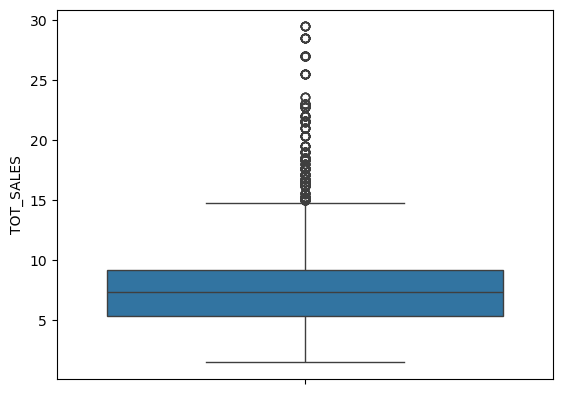

In [15]:
# Making a boxplot for total sales to look at outliers

sns.boxplot(transactions.TOT_SALES)

In [16]:
# The boxplot shows that values above 15 are outliers

threshold = 15
sales_gt_threshold = transactions[transactions['TOT_SALES'] > threshold].shape[0]
print(f"Transactions with TOT_SALES > {threshold}: {sales_gt_threshold}")

Transactions with TOT_SALES > 15: 538


In [17]:
# Removing transactions where total sales are above 15

transactions = transactions[transactions['TOT_SALES'] <= 15]

## Merging Both Datasets

In [18]:
# Merge the cleaned transactions with customer data
merged_data = pd.merge(transactions, customers, how='left', on='LYLTY_CARD_NBR')

# Confirm structure
print(merged_data.info())

# Check for missing values after merge
print(merged_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264296 entries, 0 to 264295
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264296 non-null  datetime64[ns]
 1   STORE_NBR         264296 non-null  int64         
 2   LYLTY_CARD_NBR    264296 non-null  int64         
 3   TXN_ID            264296 non-null  int64         
 4   PROD_NBR          264296 non-null  int64         
 5   PROD_NAME         264296 non-null  object        
 6   PROD_QTY          264296 non-null  int64         
 7   TOT_SALES         264296 non-null  float64       
 8   PACK_SIZE         264296 non-null  float64       
 9   BRAND             264296 non-null  object        
 10  LIFESTAGE         264296 non-null  object        
 11  PREMIUM_CUSTOMER  264296 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 24.2+ MB
None
DATE                0
STORE_NBR 

## Analysis

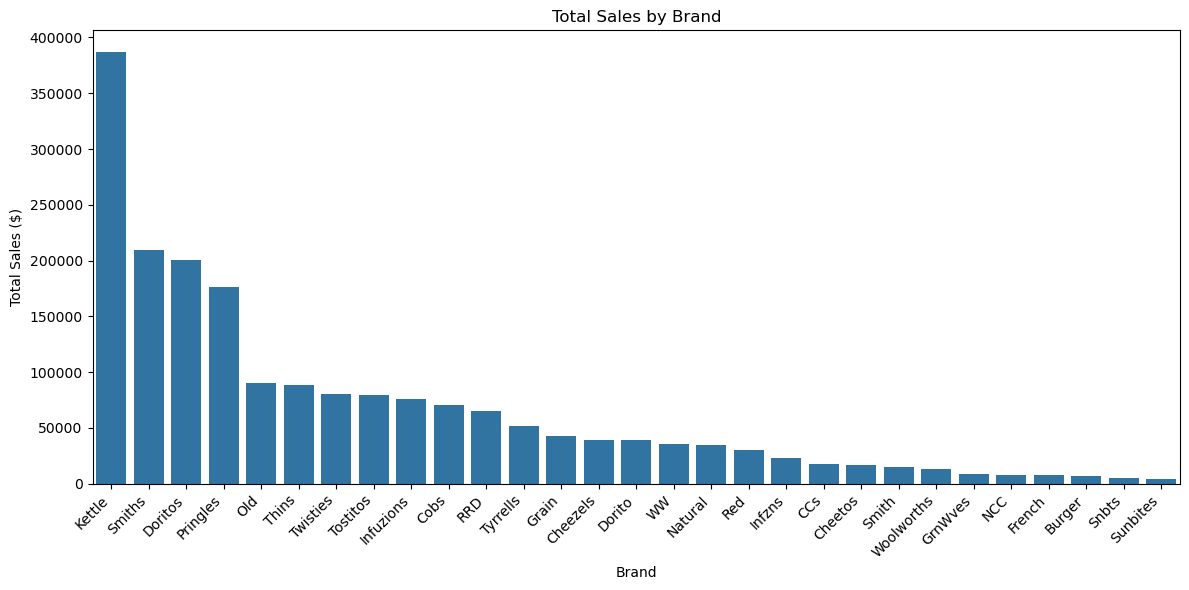

In [19]:
# Brand Sales

# Sort total sales by brand
brand_sales = merged_data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=brand_sales, x='BRAND', y='TOT_SALES')
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales by Brand')
plt.ylabel('Total Sales ($)')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

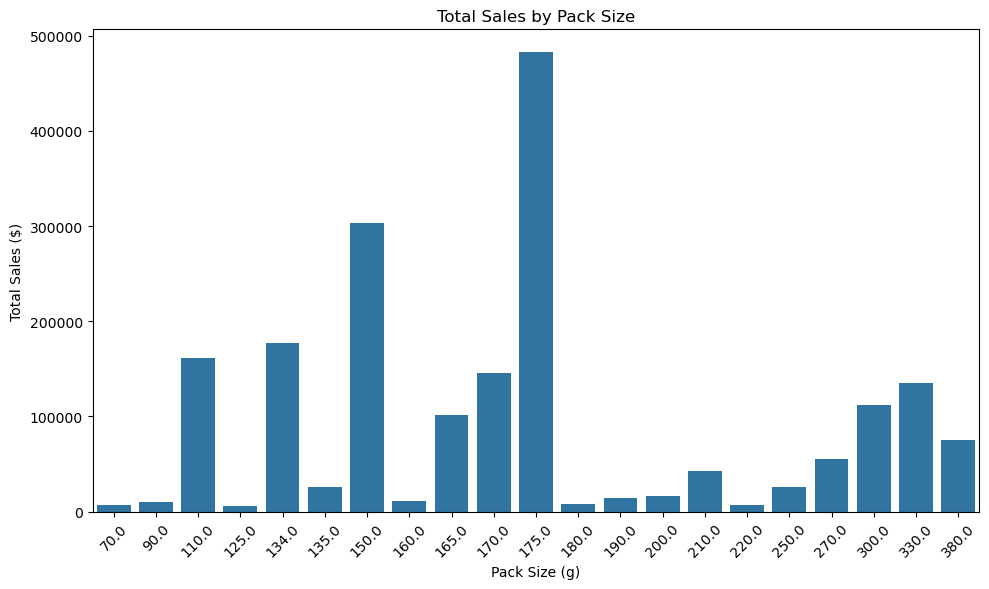

In [20]:
# Pack sizes sold

# Sort total sales by pack size
pack_sales = merged_data.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=pack_sales, x='PACK_SIZE', y='TOT_SALES')
plt.title('Total Sales by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

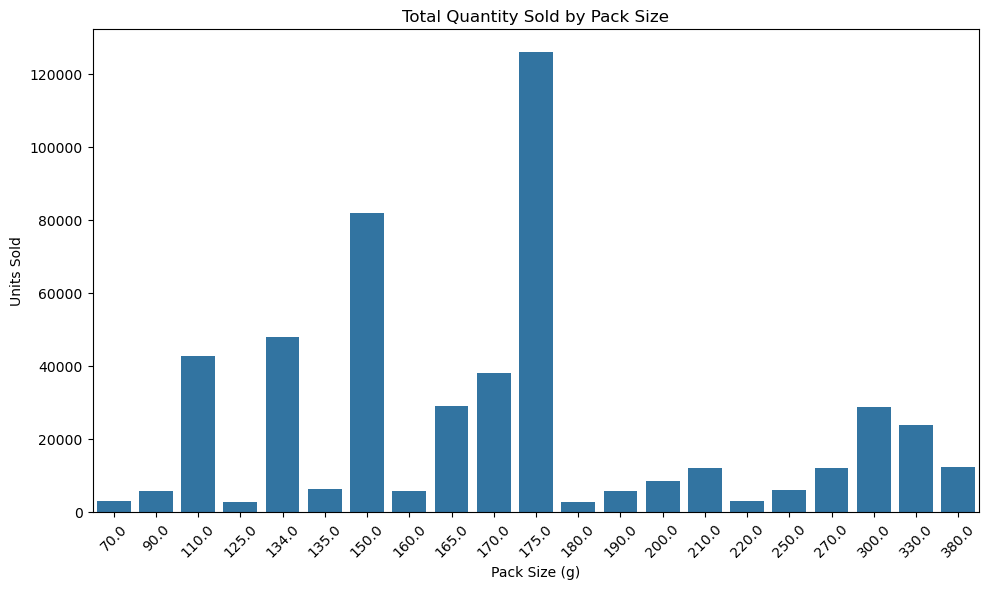

In [21]:
# Quantity sold for each pack size

pack_qty = merged_data.groupby('PACK_SIZE')['PROD_QTY'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=pack_qty, x='PACK_SIZE', y='PROD_QTY')
plt.title('Total Quantity Sold by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

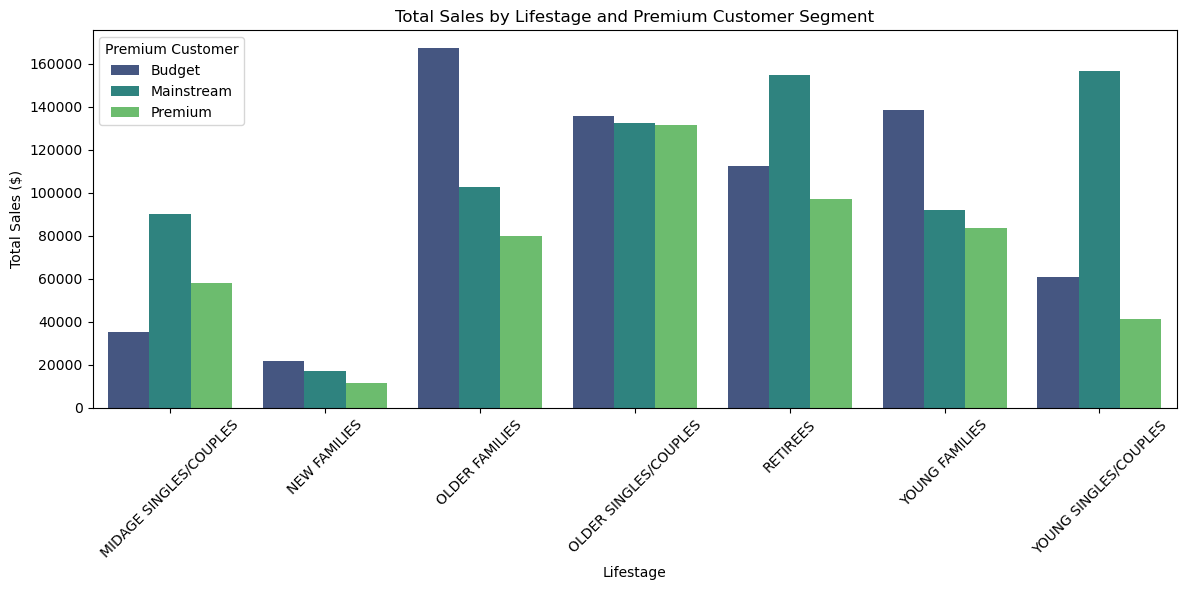

In [25]:
# Total spend by different customer types segment

segment_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], observed=True)['TOT_SALES'].sum().reset_index()

# Plotting bar plot

plt.figure(figsize=(12,6))
sns.barplot(data=segment_sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title('Total Sales by Lifestage and Premium Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales ($)')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Aggregate total sales by segment
segment_sales = merged_data.groupby('SEGMENT', observed=True)['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

print(segment_sales.head(10))

                              SEGMENT  TOT_SALES
0             OLDER FAMILIES - Budget  167258.95
1  YOUNG SINGLES/COUPLES - Mainstream  156897.00
2               RETIREES - Mainstream  155048.45
3             YOUNG FAMILIES - Budget  138493.20
4      OLDER SINGLES/COUPLES - Budget  135858.90
5  OLDER SINGLES/COUPLES - Mainstream  132633.30
6     OLDER SINGLES/COUPLES - Premium  131508.95
7                   RETIREES - Budget  112430.70
8         OLDER FAMILIES - Mainstream  102758.80
9                  RETIREES - Premium   97148.50


In [29]:
packsize_segment = merged_data.groupby(['SEGMENT', 'PACK_SIZE'], observed=True)['TOT_SALES'].sum().unstack().fillna(0)

print(packsize_segment.head(10))

PACK_SIZE                            70.0    90.0     110.0  125.0    134.0  \
SEGMENT                                                                       
MIDAGE SINGLES/COUPLES - Budget      122.4   222.7   3112.2  105.0   3141.3   
MIDAGE SINGLES/COUPLES - Mainstream  230.4   224.4   8170.0  142.8   8121.5   
MIDAGE SINGLES/COUPLES - Premium     280.8   351.9   4788.0  184.8   5520.4   
NEW FAMILIES - Budget                 60.0    86.7   2055.8   75.6   2168.2   
NEW FAMILIES - Mainstream             36.0    44.2   1512.4   58.8   1557.7   
NEW FAMILIES - Premium                31.2    45.9   1041.2   71.4   1172.9   
OLDER FAMILIES - Budget              662.4  1003.0  13307.6  627.9  14226.5   
OLDER FAMILIES - Mainstream          424.8   564.4   8287.8  319.2   8883.7   
OLDER FAMILIES - Premium             376.8   482.8   6422.0  264.6   7252.0   
OLDER SINGLES/COUPLES - Budget       537.6   612.0  11745.8  390.6  13094.3   

PACK_SIZE                             135.0    150.

## Conclusion

Our analysis reveals that sales are primarily driven by Budget – older families, Mainstream – young singles/couples, and Mainstream – retirees shoppers. The notably high chip spend among Mainstream young singles/couples and retirees appears largely due to their greater population size compared to other segments. Additionally, Mainstream mid-age and young singles/couples tend to spend more per packet, suggesting impulse buying behavior. Notably, these budget-conscious older segments consistently purchase high volumes of larger pack sizes (150g, 250g, 300g, and above), suggesting they prefer buying in bulk or larger quantities.

The Midage Singles/Couples - Mainstream segment also shows strong purchasing patterns, especially favoring mid-range pack sizes (110g to 170g) with very high sales volumes, reflecting both volume and variety preferences in this demographic.

In contrast, the New Families segments, regardless of premium status, contribute relatively lower total sales across all pack sizes, indicating either smaller household sizes or lower purchasing frequency for these products.

These insights suggest that promotional efforts and merchandising strategies should focus on larger pack sizes in locations frequented by older families and singles/couples, especially those in the budget segment. Meanwhile, midage mainstream singles and couples represent an important demographic for mid-sized pack promotions.

By tailoring product placement and marketing to these key segments and their preferred pack sizes, retailers can maximize visibility and sales performance